In [ ]:
import numpy as np
import timeit
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns


: 

In [ ]:
df=pd.read_csv("MCI_2014_to_2019.csv")
df['Total'] = 1
df.head()

: 

In [ ]:
df.dtypes
df.dropna()

: 

In [ ]:
print('Original Data Size after dropping Duplicates')
df = df.drop_duplicates(subset='event_unique_id',keep='first')
df.shape

: 

In [ ]:
drop_colmns = ['X', 'Y', 'Index_', 'reporteddate', 'reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear',
               'reporteddayofweek', 'reportedhour', 'Hood_ID', 'ucr_code', 'ucr_ext', 'Division', 'occurrencedayofyear']
df_dropped = df.drop(columns=drop_colmns)


: 

In [ ]:
df_dropped.dtypes

: 

In [ ]:
assault = df[df['MCI'] == 'Assault']
assault_types = assault.groupby('offence', as_index=False).size()
print(assault_types)
ct = assault_types.sort_values(by='size', ascending=False)


: 

In [ ]:
df_grouped = df_dropped.groupby(df_dropped['occurrenceyear'])

: 

In [ ]:
#Analysis by year
df_2015 = df_grouped.get_group(2015)
df_2016 = df_grouped.get_group(2016)
df_2017 = df_grouped.get_group(2017)

: 

In [ ]:
df_2015_grouped = df_2015.groupby(df_2015['MCI']).count()
df_2016_grouped = df_2016.groupby(df_2016['MCI']).count()
df_2017_grouped = df_2017.groupby(df_2017['MCI']).count()

: 

In [ ]:
plot = df_2015_grouped.iloc[:,0]
plot = pd.DataFrame(plot)
plot.columns = ['Number of Cases']
ax = plot.plot(kind='barh',figsize=(15,5),title='Number of Major Crimes Reported in Toronto in 2015')

: 

In [ ]:
df.head()

: 

In [ ]:

col_list = ['occurrenceyear',	'occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek','occurrencehour','MCI',	'Division',	'Hood_ID','premisetype']


df2 = df[col_list]
df2 = df2[df2['occurrenceyear'] > 2013]

#Factorize dependent variable column:
crime_var = pd.factorize(df2['MCI'])
df2['MCI'] = crime_var[0]
definition_list_MCI = crime_var[1]

#factorize independent variables:
premise_var = pd.factorize(df2['premisetype'])
df2['premisetype'] = premise_var[0]
definition_list_premise = premise_var[1] 

#factorize occurenceyear:
year_var = pd.factorize(df2['occurrenceyear'])
df2['occurrenceyear'] = year_var[0]
definition_list_year = year_var[1] 

#factorize occurencemonth:
month_var = pd.factorize(df2['occurrencemonth'])
df2['occurrencemonth'] = month_var[0]
definition_list_month = month_var[1] 

#factorize occurenceday:
day_var = pd.factorize(df2['occurrenceday'])
df2['occurenceday'] = day_var[0]
definition_list_day = day_var[1] 

#factorize occurencedayofweek:
dayweek_var = pd.factorize(df2['occurrencedayofweek'])
df2['occurrencedayofweek'] = dayweek_var[0]
definition_list_day = dayweek_var[1] 

#factorize division:
division_var = pd.factorize(df2['Division'])
df2['Division'] = division_var[0]
definition_list_division = division_var[1] 

#factorize HOOD_ID:
hood_var = pd.factorize(df2['Hood_ID'])
df2['Hood_ID'] = hood_var[0]
definition_list_hood = hood_var[1] 

#factorize occurencehour:
hour_var = pd.factorize(df2['occurrencehour'])
df2['occurrencehour'] = hour_var[0]
definition_list_hour = hour_var[1] 

#factorize occurencedayofyear:
dayyear_var = pd.factorize(df2['occurrencedayofyear'])
df2['occurrencedayofyear'] = dayyear_var[0]
definition_list_dayyear = dayyear_var[1]

: 

In [ ]:
df2.head()

: 

In [ ]:
x = df2.drop(['MCI'], axis=1).values
y = df2['MCI'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=21)

binary_encoder = OneHotEncoder(sparse_output=False, categories='auto')
encoded_X = binary_encoder.fit_transform(x)
X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(encoded_X, y, test_size=0.25, random_state=21)

classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("\n--- Results for Random Forest with Factorized Features ---")
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=definition_list_MCI, 
            yticklabels=definition_list_MCI) 
plt.title('Confusion Matrix - Factorized Features')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=definition_list_MCI))


: 

In [ ]:
print("\n--- Results for Random Forest with OneHotEncoder Features ---")

classifier_OH = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier_OH.fit(X_train_OH, y_train_OH)
y_pred_OH = classifier_OH.predict(X_test_OH)


print("Accuracy:", accuracy_score(y_test_OH, y_pred_OH))

cm_OH = confusion_matrix(y_test_OH, y_pred_OH)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_OH, annot=True, fmt='d', cmap='Greens', 
            xticklabels=definition_list_MCI,
            yticklabels=definition_list_MCI)
plt.title('Confusion Matrix - One-Hot Encoded Features')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()

print("\nClassification Report (One-Hot Encoded):")
print(classification_report(y_test_OH, y_pred_OH, target_names=definition_list_MCI))


: 

In [ ]:
import seaborn as sns
mci_monthwise = df.groupby(['occurrencemonth', 'MCI'], as_index=False).agg({'Total': 'sum'})

plt.figure(figsize=(15, 7))
crime_count = mci_monthwise.pivot(index="MCI", columns="occurrencemonth", values="Total")

plt.yticks(rotation=1)
ax = sns.heatmap(crime_count, cmap="YlGnBu", linewidths=.5)
plt.title("Major Crime Indicators by Month", color='red', fontsize=14)
plt.show()

: 

In [ ]:
major_crime_indicator = df.groupby('MCI', as_index=False).size()

fig, ax = plt.subplots(figsize=(15, 6))
ct = major_crime_indicator.sort_values(by='size', ascending=False)
ct.plot.bar(ax=ax)


ax.set_xlabel('Offence')
ax.set_ylabel('Total Number of Criminal Cases from 2014 to 2019')
ax.set_title('Crime Indicator', color='red', fontsize=25)
plt.show()

: 

In [ ]:
hour_crime_group = df.groupby(['occurrencehour','MCI'],as_index=False).agg({'Total':'sum'})
fig, ax = plt.subplots(figsize=(15,10))
hour_crime_group.groupby('MCI').plot(x="occurrencehour", y="Total", ax=ax,linewidth=5)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of occurences')
ax.set_title('Crime Types by Hour of Day in Toronto',color = 'red',fontsize=25)

: 

In [ ]:
df_g0 = df_2015.groupby(['Neighbourhood','MCI']).size().to_frame('count').reset_index()
df_g0 = df_g0.pivot(index='Neighbourhood',columns='MCI',values='count')
df_g0 = df_g0.dropna()

df_g = df_2016.groupby(['Neighbourhood','MCI']).size().to_frame('count').reset_index()
df_g = df_g.pivot(index='Neighbourhood',columns='MCI',values='count')
df_g = df_g.dropna()


df_g2 = df_2017.groupby(['Neighbourhood','MCI']).size().to_frame('count').reset_index()
df_g2 = df_g2.pivot(index='Neighbourhood',columns='MCI',values='count')
df_g2 = df_g2.dropna()

: 

In [ ]:
df_g0.head(10)

: 

In [ ]:
scaler = StandardScaler()
Sum_of_squared_distances0 = []
Sum_of_squared_distances = []
Sum_of_squared_distances2 = []

std_scale = scaler.fit(df_g0)
df_transformed0 = std_scale.transform(df_g0)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed0)
X0 = pca.transform(df_transformed0)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed0)
    Sum_of_squared_distances0.append(km.inertia_)


std_scale = scaler.fit(df_g)
df_transformed = std_scale.transform(df_g)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed)
X = pca.transform(df_transformed)
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
    
std_scale = scaler.fit(df_g2)
df_transformed2 = std_scale.transform(df_g2)
pca = PCA(n_components=3)
pca = pca.fit(df_transformed2)
X1 = pca.transform(df_transformed2)

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed2)
    Sum_of_squared_distances2.append(km.inertia_)


: 

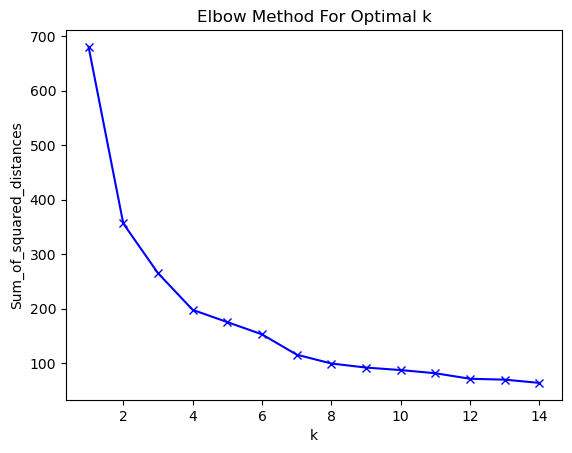

In [ ]:
plt.plot(K, Sum_of_squared_distances0, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

: 

In [ ]:
plt.plot(K, Sum_of_squared_distances2, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

: 

In [ ]:
X_list = [X0, X, X1]
year_list = [2015,2016,2017]
for i,y in zip(X_list,year_list):
    from sklearn import metrics
    clustering = KMeans(n_clusters=2,random_state=3425).fit(i)
    labels = clustering.labels_
    print("Silhouette score(K-means) for year",y,"is",metrics.silhouette_score(i, labels, metric='euclidean'))

: 

In [ ]:
neighborhoods0 = df_g0.index
neighborhoods0 = np.array(neighborhoods0)

neighborhoods = df_g.index
neighborhoods = np.array(neighborhoods)

neighborhoods2 = df_g2.index
neighborhoods2 = np.array(neighborhoods2)
#Display Neighboorhoods
print('Crime Neighborhoods by K-Means in 2015')
print(neighborhoods0[np.where(klabel0[0]==1)])
kviolent15 = neighborhoods0[np.where(klabel0[0]==1)]
kviolent15s = neighborhoods0[np.where(klabel0[0]==0)]
kviolent15m = neighborhoods0[np.where(klabel0[0]==2)]

print('Crime Neighborhoods by K-Means in 2016')
print(neighborhoods[np.where(klabel1[0]==1)])
kviolent16 = neighborhoods[np.where(klabel1[0]==1)]
kviolent16s = neighborhoods[np.where(klabel1[0]==0)]
kviolent16m = neighborhoods[np.where(klabel1[0]==2)]


print('Crime Neighborhoods by K-Means in 2017')
print(neighborhoods2[np.where(klabel2[0]==1)])
kviolent17 = neighborhoods2[np.where(klabel2[0]==1)]
kviolent17s = neighborhoods2[np.where(klabel2[0]==0)]
kviolent17m = neighborhoods2[np.where(klabel2[0]==2)]

: 

In [ ]:
plt.figure(num=None, figsize=(10, 8))
plt.scatter("Long", "Lat", data = df, c = 'y',alpha = 0.1, edgecolor = 'black', s=2)
plt.grid()
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Toronto Crime')
plt.tight_layout()
plt.axis('tight')

plt.show()

: 

: 

: 

: 